In [1]:
from transition_time_test import alpha, load_results, save_directory
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Added /Users/cfn18/Documents/PhD-Work/Third-Year/Instanton-Work/Double-Well-SR to sys.path.


In [2]:
from stochastic_double_well import *

In [3]:
%%timeit

# Time double well for now as cpu timings were messed up, 
double_well_em(np.array([-1, 0]), np.arange(0, 1, 0.1), [0., 0.1])

243 µs ± 5.48 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
results = load_results(0)

In [5]:
def mean_integration_time(r):
    "How long it takes to find a transition"
    return np.mean(r['cpu_times(s)'])

def time_in_minutes_per_transitions(r): # change to use cpu times when done properly
    return (mean_integration_time(r))/(60)

In [6]:
# Printing Results

for r in results:
    sigma = r['sigma']
    no_of_transitions = r['number_of_transitions']
    time_in_mins = time_in_minutes_per_transitions(r)
    transitions_per_day = (24 * 60)/time_in_mins
    print(f'For sigma = {sigma:.2f} we found {no_of_transitions} transitions.')
    print(f'It took roughly {time_in_mins:.2e} minutes to find a transition.')
    print(f'In a day we would find around {transitions_per_day:.2e} transitions')
    print()

For sigma = 0.30 we found 100 transitions.
It took roughly 7.98e-03 minutes to find a transition.
In a day we would find around 1.80e+05 transitions

For sigma = 0.25 we found 100 transitions.
It took roughly 4.52e-02 minutes to find a transition.
In a day we would find around 3.19e+04 transitions

For sigma = 0.20 we found 43 transitions.
It took roughly 6.71e+00 minutes to find a transition.
In a day we would find around 2.15e+02 transitions

For sigma = 0.19 we found 18 transitions.
It took roughly 1.59e+01 minutes to find a transition.
In a day we would find around 9.07e+01 transitions

For sigma = 0.18 we found 2 transitions.
It took roughly 1.20e+02 minutes to find a transition.
In a day we would find around 1.20e+01 transitions

For sigma = 0.17 we found 1 transitions.
It took roughly 1.71e+02 minutes to find a transition.
In a day we would find around 8.41e+00 transitions



In [7]:
def result_to_df(results):
    dfs = []
    for r in results:
        sigma = r['sigma']
        sigmas = np.full_like(r['cpu_times(s)'], sigma)
        integration_time = r['integration_times']
        cpu_time_in_seconds = np.array(r['cpu_times(s)'])
        cpu_time_in_minutes = cpu_time_in_seconds/60
        cpu_time_in_hours = cpu_time_in_minutes/60
        cpu_time_in_days = cpu_time_in_hours/24
        transitions_per_day = 1/cpu_time_in_days
        dfs.append(pd.DataFrame(np.stack([sigmas, cpu_time_in_seconds, transitions_per_day, integration_time]).T, columns = ['sigma', 'cpu_time', 'Transitions per day', 'Integration Time']))      
    return pd.concat(dfs)



In [8]:
import seaborn as sns

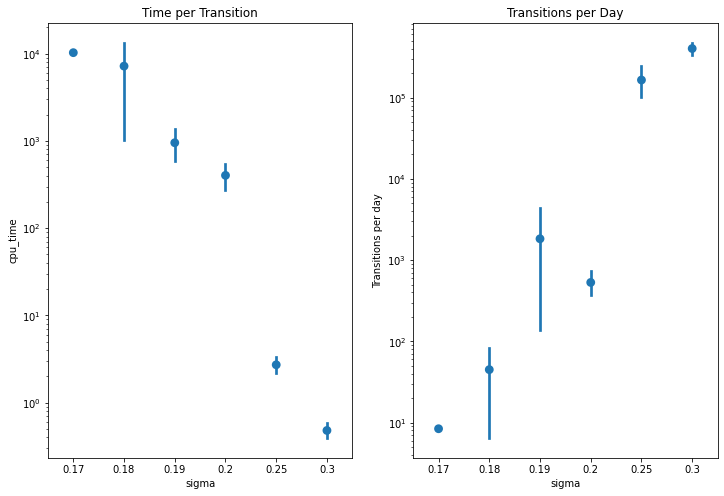

In [9]:
data = result_to_df(results)
fig, axes = plt.subplots( figsize=(12, 8), ncols=2)
sns.pointplot(x='sigma', y='cpu_time', data=data, ax=axes[0], join=False)
# sns.pointplot(x='sigma', y='Integration Time', data=data, ax=axes[0], join=False)
axes[0].set_title('Time per Transition')
sns.pointplot(x='sigma', y='Transitions per day', data=data, ax=axes[1], join=False)
axes[1].set_title('Transitions per Day')

for ax in axes:
    ax.set_yscale('log')

In [10]:
import scipy.stats as st

(199.8, 7355.637000000001)
7555.437000000001


KstestResult(statistic=0.03968038314115263, pvalue=0.9957719730352182)

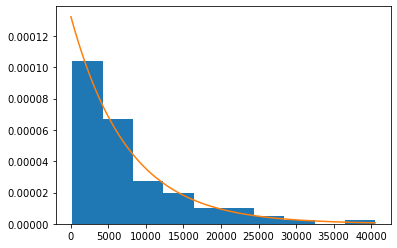

In [160]:
y = integration_times
x = np.linspace(0, np.max(y), 1000)
dist_exp = st.expon.pdf(x, scale=np.mean(y))
plt.hist(y, density=True, bins=nbins)
plt.plot(x, dist_exp)

dist = st.expon
args = dist.fit(y)
print(args)
print(np.mean(y))

st.kstest(y, st.expon.cdf, args=(0, np.mean(y)))

In [161]:
st.kstest(y, 'expon')

KstestResult(statistic=1.0, pvalue=0.0)

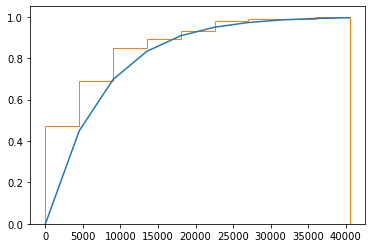

0.47000000000000003

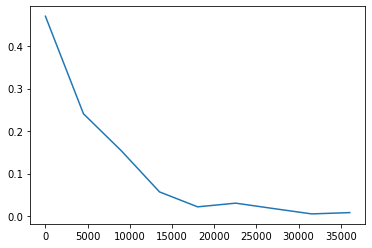

In [183]:
x = np.linspace(0, np.max(y), 10)


cdf = st.expon.cdf(x, scale=np.mean(y))


plt.plot(x, cdf)
counts, bins, patches = plt.hist(y, density=True, cumulative=True, histtype='step', bins=x, align='mid')
plt.show()
plt.plot(bins[:-1], (counts - cdf[:-1]))
np.max(np.abs(counts - cdf[:-1]))

In [47]:
numerical_pdf, bin_edges = np.histogram(y, density=True, nbins=10)
plt.plot(numerical_pdf)

TypeError: _histogram_dispatcher() got an unexpected keyword argument 'nbins'

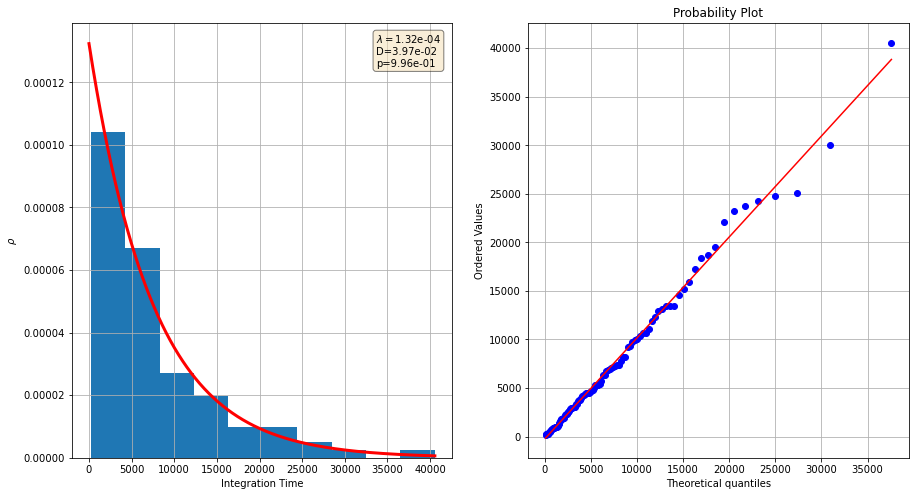

In [204]:
def exponential_check_plots(y, variable_name=''):
    "Returns standard plots to check if some data y is exponentially distributed"
    nbins = int(len(y)/10)
    
    # Plotting Histogram
    fig, axes = plt.subplots(ncols=2, figsize=(15, 8))
    axes[0].hist(y, bins=nbins, density=True)
    axes[0].grid()
    
    # Fitting and plotting an exponential
    x = np.linspace(0, np.max(y), 1000)
    dist_exp = st.expon.pdf(x, scale=np.mean(y))
    axes[0].plot(x, dist_exp, '-r', lw=3)
    axes[0].set_ylabel('$\\rho$')
    axes[0].set_xlabel(variable_name)
    
    # Kolmogorov–Smirnov Goodness of fit test
    ks_stat, p_value = st.kstest(y, st.expon.cdf, args=(0, np.mean(y)))
    
    # Adding Stats Text box
    stats_string = f'$\\lambda=${1/np.mean(y):.2e}\nD={ks_stat:.2e}\np={p_value:.2e}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[0].text(0.8, 0.9, stats_string, transform=axes[0].transAxes, bbox=props)
    
    # Q-Q Plot
    axes[1].grid()
    res = st.probplot(integration_times, plot=axes[1], dist=st.expon, sparams=(0, np.mean(y)))

    return fig, axes


    
fig, axes = exponential_check_plots(integration_times, variable_name='Integration Time')

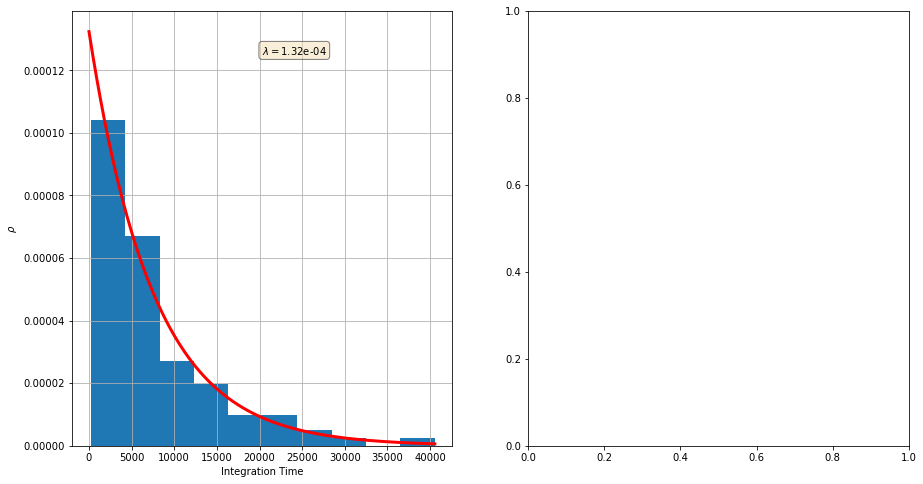

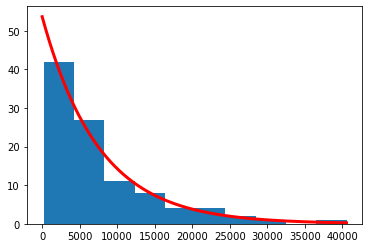

(199.8, 7355.637000000001)
KstestResult(statistic=0.05704310367114068, pvalue=0.8822226845878305)


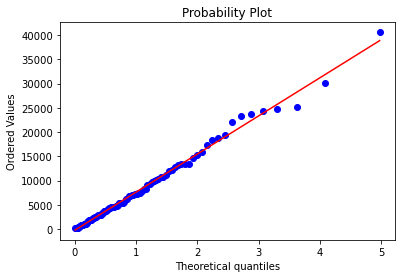

In [35]:
for r in results[1:2]:
    nbins=10
    integration_times = r['integration_times']
    plt.hist(integration_times, bins=nbins)
    rate = 1/np.mean(integration_times)

    time_max = np.max(integration_times)
    times = np.linspace(0., time_max, 1000)
    # bin size: interval between two
    # consecutive values in `days`
    dt = time_max / 999.
    dist_exp = st.expon.pdf(times, scale=1. / rate)
    plt.plot(times, dist_exp * len(integration_times) * time_max / nbins,
        '-r', lw=3)
    plt.show()
    dist = st.expon
    args = dist.fit(integration_times)
    print(args)
    print(st.kstest(integration_times, dist.cdf, args))
    res = st.probplot(integration_times, plot=plt, dist=st.expon)
    plt.show()
